#📌 Extracción

In [40]:
import pandas as pd
import json
from pandas import json_normalize

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

print (df.head)

<bound method NDFrame.head of       customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             

#🔧 Transformación

In [41]:
df = json_normalize(df.to_dict(orient='records'))

df.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.tenure': 'tenure',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'Charges_Monthly',
    'account.Charges.Total': 'Charges_Total'
}, inplace=True)

df['Charges_Monthly'] = pd.to_numeric(df['Charges_Monthly'], errors='coerce')
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

print(df.head())
print(df.info())

   customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female             0     Yes        Yes       9   
1  0003-MKNFE    No    Male             0      No         No       9   
2  0004-TLHLJ   Yes    Male             0      No         No       4   
3  0011-IGKFF   Yes    Male             1     Yes         No      13   
4  0013-EXCHZ   Yes  Female             1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1             

In [42]:
columnas_relevantes = [
    'Churn', 'gender', 'SeniorCitizen', 'tenure', 'Contract', 'PaymentMethod',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Charges_Monthly', 'Charges_Total'
]
df = df[columnas_relevantes]

categoricas = [
    'Churn', 'gender', 'SeniorCitizen', 'Contract', 'PaymentMethod',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]
for col in categoricas:
    df[col] = df[col].astype('category')

df['Charges_Monthly'] = pd.to_numeric(df['Charges_Monthly'], errors='coerce').fillna(0)
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce').fillna(0)
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce').fillna(0)

df['AvgMonthlyCharge'] = df['Charges_Total'] / df['tenure'].replace(0, 1)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7267 non-null   category
 1   gender            7267 non-null   category
 2   SeniorCitizen     7267 non-null   category
 3   tenure            7267 non-null   int64   
 4   Contract          7267 non-null   category
 5   PaymentMethod     7267 non-null   category
 6   PhoneService      7267 non-null   category
 7   MultipleLines     7267 non-null   category
 8   InternetService   7267 non-null   category
 9   OnlineSecurity    7267 non-null   category
 10  OnlineBackup      7267 non-null   category
 11  DeviceProtection  7267 non-null   category
 12  TechSupport       7267 non-null   category
 13  StreamingTV       7267 non-null   category
 14  StreamingMovies   7267 non-null   category
 15  Charges_Monthly   7267 non-null   float64 
 16  Charges_Total     7267 n

In [43]:
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")


Número de filas duplicadas: 50


In [47]:
df = df.drop_duplicates()
df = df.dropna()
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")

Número de filas después de eliminar duplicados: 6311


In [45]:
df['Cuentas_Diarias'] = df['Charges_Monthly'] / 30
print(df[['Charges_Monthly', 'Cuentas_Diarias']].head())

   Charges_Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [46]:
binarias = [
    'Churn', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]

# Reemplazar Sí/No por 1/0
for col in binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})  # algunos servicios tienen "No internet service"

# Verificar
print(df[binarias].head())

   Churn PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0    0.0            1            0.0               0             1   
1    0.0            1            1.0               0             0   
2    1.0            1            0.0               0             0   
3    1.0            1            0.0               0             1   
4    1.0            1            0.0               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
0                 0            1            1                0  
1                 0            0            0                1  
2                 1            0            0                0  
3                 1            0            1                1  
4                 0            1            1                0  


In [48]:
categoricas_multi = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
df = pd.get_dummies(df, columns=categoricas_multi, drop_first=True)


In [49]:
print(df.head())

   Churn SeniorCitizen  tenure PhoneService  MultipleLines  OnlineSecurity  \
0    0.0             0       9            1            0.0               0   
1    0.0             0       9            1            1.0               0   
2    1.0             0       4            1            0.0               0   
3    1.0             1      13            1            0.0               0   
4    1.0             1       3            1            0.0               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             1                 0            1            1  ...   
1             0                 0            0            0  ...   
2             0                 1            0            0  ...   
3             1                 1            0            1  ...   
4             0                 0            1            1  ...   

   AvgMonthlyCharge  Cuentas_Diarias  gender_Male  Contract_One year  \
0         65.922222         2.186667        False 

#📊 Carga y análisis

In [50]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas para análisis descriptivo:", list(numericas))

metricas = df[numericas].describe().T  # Transponer para mejor lectura
metricas['mediana'] = df[numericas].median()
metricas['rango'] = metricas['max'] - metricas['min']
metricas['varianza'] = df[numericas].var()
metricas['coef_var'] = df[numericas].std() / df[numericas].mean()  # Coeficiente de variación
print(metricas)

Columnas numéricas para análisis descriptivo: ['Churn', 'tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Charges_Monthly', 'Charges_Total', 'AvgMonthlyCharge', 'Cuentas_Diarias']
                   count         mean          std        min         25%  \
Churn             6311.0     0.265251     0.441502   0.000000    0.000000   
tenure            6311.0    32.688164    24.532001   0.000000    9.000000   
MultipleLines     6311.0     0.470607     0.499175   0.000000    0.000000   
OnlineSecurity    6311.0     0.275075     0.446588   0.000000    0.000000   
OnlineBackup      6311.0     0.339249     0.473492   0.000000    0.000000   
DeviceProtection  6311.0     0.335288     0.472128   0.000000    0.000000   
TechSupport       6311.0     0.278086     0.448091   0.000000    0.000000   
StreamingTV       6311.0     0.383774     0.486343   0.000000    0.000000   
StreamingMovies   6311.0     0.385676     0.48

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
0.0    4637
1.0    1674
Name: count, dtype: int64


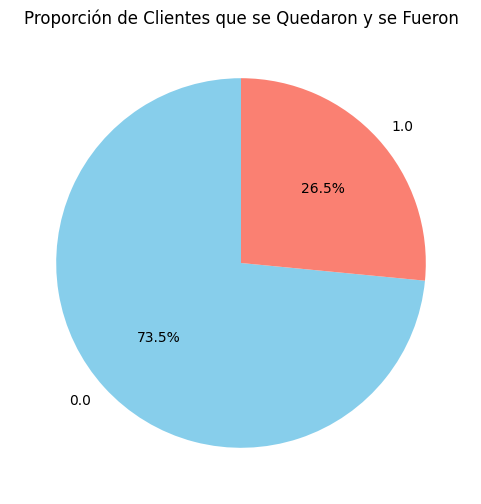

In [52]:
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue','salmon'], startangle=90)
plt.title('Proporción de Clientes que se Quedaron y se Fueron')
plt.show()

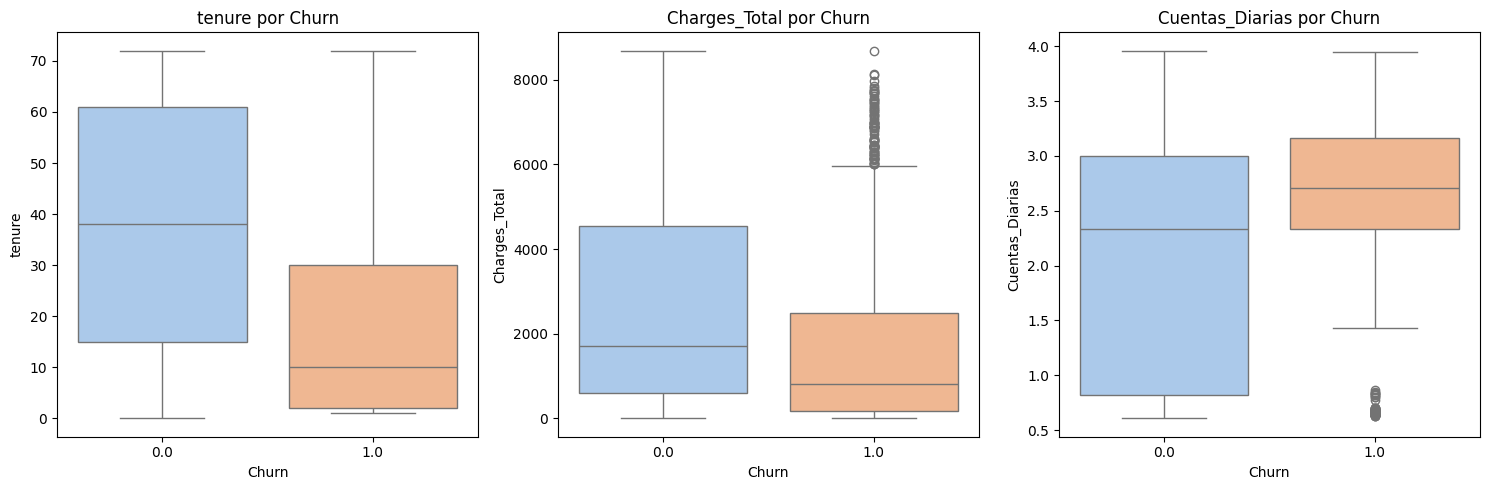

In [53]:
import math

numericas2 = ['tenure', 'Charges_Total', 'Cuentas_Diarias']

# Número de columnas y filas necesarias para subplots
n = len(numericas2)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5*cols, 5*rows))
for i, col in enumerate(numericas2, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Churn', y=col, data=df, hue='Churn', palette='pastel', dodge=False, legend=False)
    plt.title(f'{col} por Churn')
plt.tight_layout()
plt.show()


Distribución después de SMOTE:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


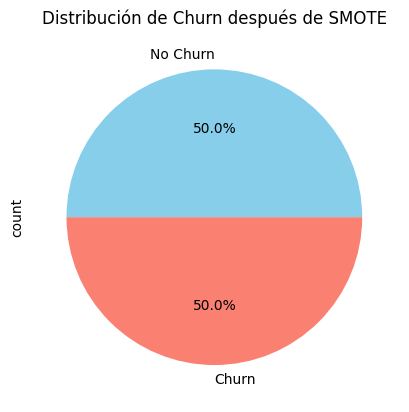

In [54]:
#Aplicar SMOTE

X = df.drop("Churn", axis=1)
y = df["Churn"]

# aplicar SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_smote.value_counts(normalize=True))

y_smote.value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=["No Churn", "Churn"],
    colors=["skyblue", "salmon"]
)
plt.title("Distribución de Churn después de SMOTE")
plt.show()

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo columnas numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Incluimos Churn codificada como binaria (0 = No, 1 = Yes)
df_corr = df[numericas].copy()
df_corr["Churn_bin"] = df["Churn"]

In [69]:
correlation_matrix = df_corr.corr()

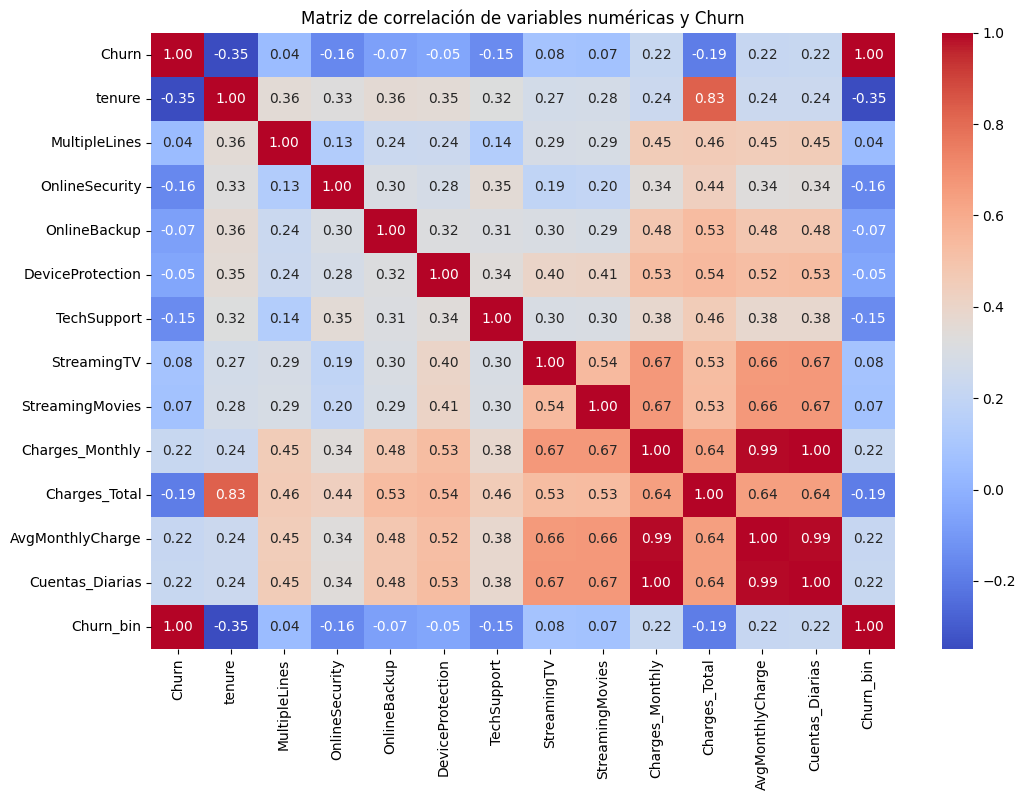

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de variables numéricas y Churn")
plt.show()

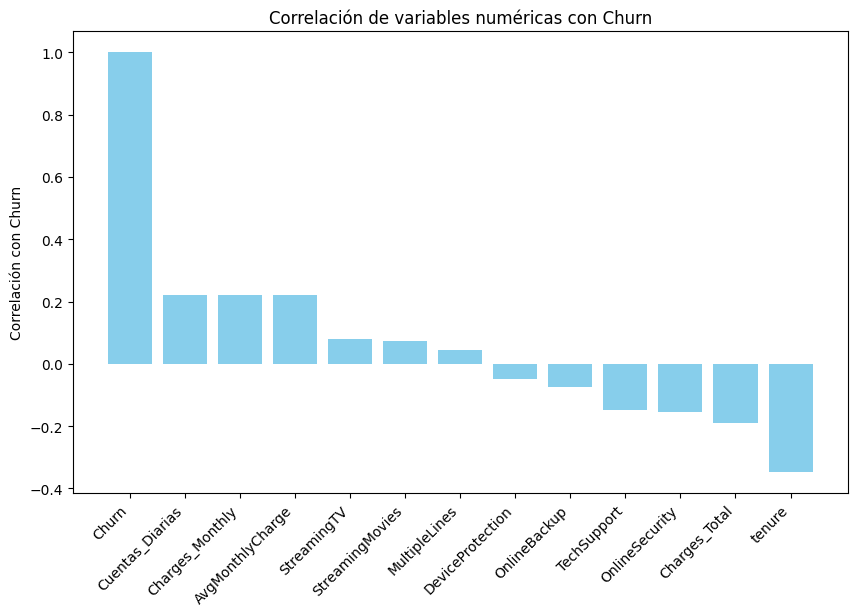

In [71]:
import matplotlib.pyplot as plt

# Calculamos la correlación con Churn_bin
corr_churn = df_corr.corr()["Churn_bin"].drop("Churn_bin")  # excluimos la correlación consigo misma

# Ordenamos de mayor a menor
corr_churn = corr_churn.sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(10,6))
plt.bar(corr_churn.index, corr_churn.values, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlación con Churn")
plt.title("Correlación de variables numéricas con Churn")
plt.show()

In [77]:
# Tomamos todas las numéricas
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features.remove("Churn")

cat_features = [
    "gender_Male", "SeniorCitizen", "PhoneService", "MultipleLines",
    "InternetService_Fiber optic", "InternetService_No", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "Contract_One year", "Contract_Two year", "PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check"]

df_model = pd.get_dummies(df[num_features + cat_features], drop_first=True)

In [79]:
X = df.drop(columns=["Churn"])  # todas menos target
y = df["Churn"]

In [95]:
# Librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Separar X e y
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Convert boolean columns to int for consistency
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)


# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define numerical features (all columns in X_train after boolean conversion)
num_features = X_train.columns.tolist()


imputer_num = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_processed = imputer_num.fit_transform(X_train[num_features])
X_train_processed = scaler.fit_transform(X_train_processed)

X_test_processed = imputer_num.transform(X_test[num_features])
X_test_processed = scaler.transform(X_test_processed)

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

resultados = []

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)


for nombre, modelo in modelos.items():
    # Entrena
    modelo.fit(X_train_smote, y_train_smote)

    # Predice
    y_pred = modelo.predict(X_test_processed)

    # Evalua
    reporte = classification_report(y_test, y_pred, output_dict=True)
    acc = accuracy_score(y_test, y_pred)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": reporte["1.0"]["precision"],
        "Recall": reporte["1.0"]["recall"],
        "F1-Score": reporte["1.0"]["f1-score"]
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.752969   0.521905  0.817910  0.637209
1        Random Forest  0.787015   0.584615  0.680597  0.628966
2              XGBoost  0.779889   0.576819  0.638806  0.606232


ANÁLISIS FINAL

Accuracy

Random Forest es el más alto (0.787), seguido de XGBoost y Logistic Regression. Sin embargo, en datasets desbalanceados, el accuracy puede ser engañoso.

Precision y Recall

Logistic Regression tiene un recall muy alto (0.818): detecta la mayoría de los churners, pero su precision es baja (0.522), es decir, también marca muchos falsos positivos. El que lo sigue es Random Forest que está más parejo entre ambas variables, pero menor Recall que Logistic

F1-Score

Logistic Regression tiene 0.637, Random Forest 0.629 y XGBoost 0.606.

Aquí la Logistic Regression y Random Forest están muy parejas, aunque Random Forest tiene un accuracy ligeramente mejor.

🔹 Conclusión rápida

Logistic Recall fue el modelo más preciso a mi parecer, aunque Random Forest no se quedó atras, pues tiene mejor precisión que Logistic aunque un Recall menor.

